
mnist_classification 3d graphs


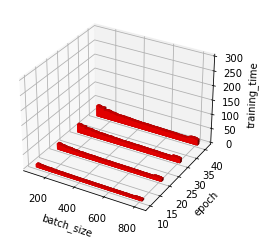

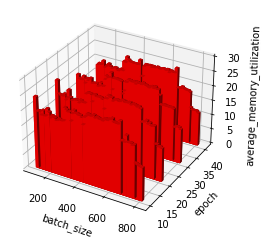

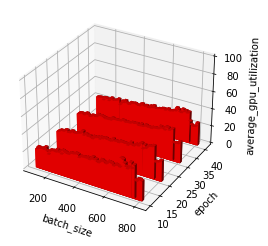


cifar10_classification 3d graphs


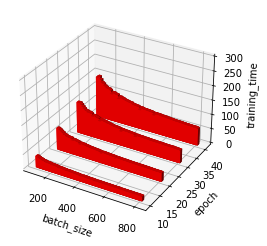

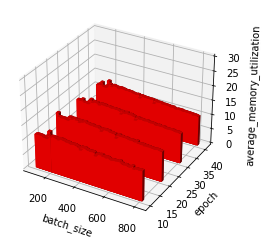

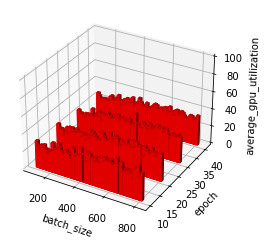


cifar10_deep_classification 3d graphs


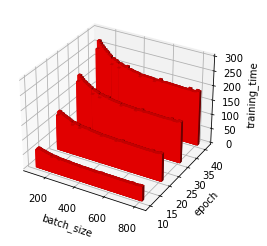

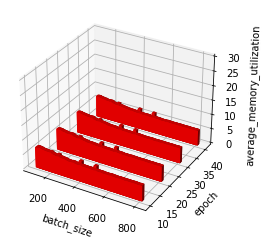

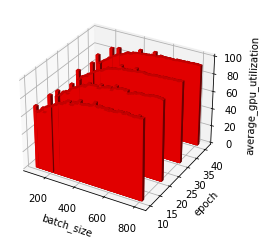


mnist_classification 2d graphs


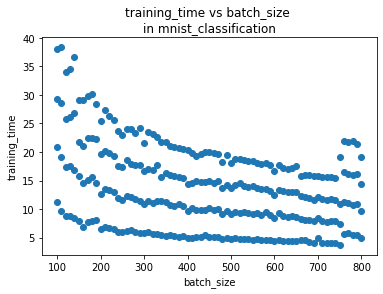

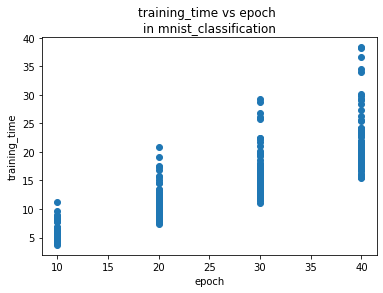

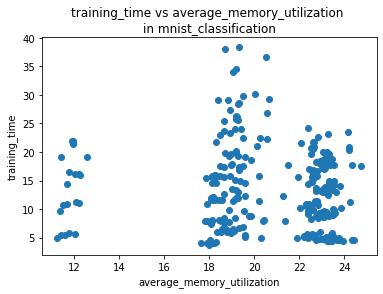

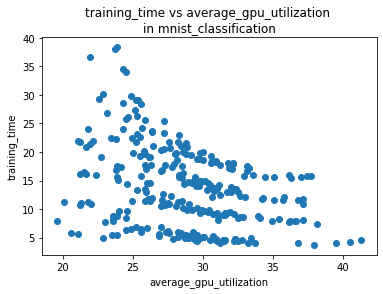


cifar10_classification 2d graphs


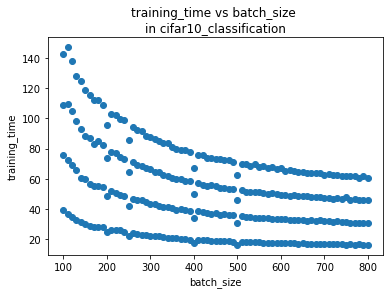

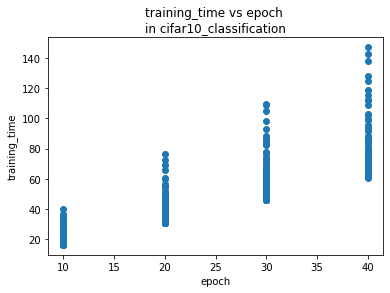

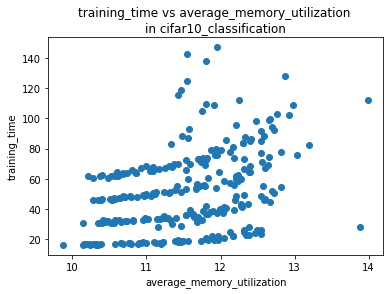

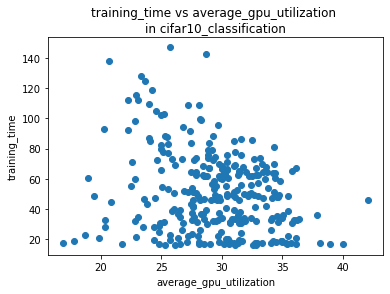


cifar10_deep_classification 2d graphs


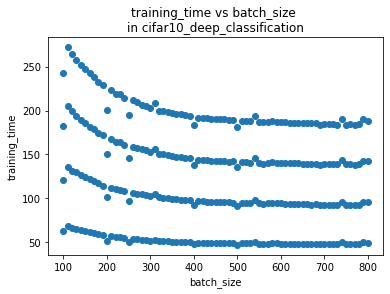

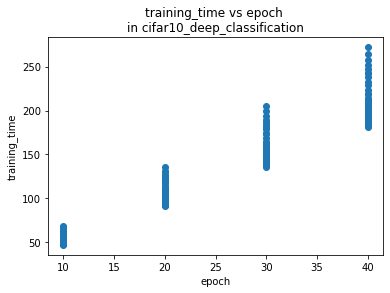

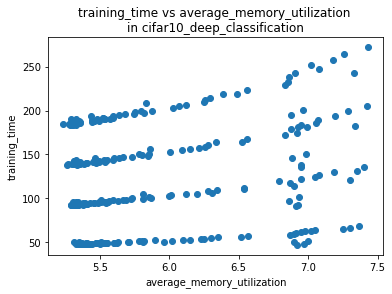

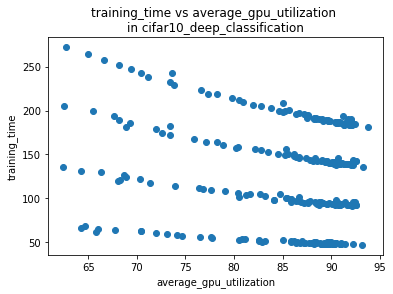

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def plot_as_2d(taskname, x_label):
    df = pd.read_csv(f"{taskname}.csv")
    
    y_label = "training_time"
    
    plt.scatter(df[x_label], df[y_label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{y_label} vs {x_label} \nin {taskname}')

    plt.show()


def plot_as_3d(taskname, z_label):
    df = pd.read_csv(f"{taskname}.csv")
    
    x_label = "batch_size"
    y_label = "epoch"
    
    X = df[[x_label, y_label]]
    y = df[z_label]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    ax.bar3d(df[x_label], df[y_label], 0, dx=20, dy=1, dz=df[z_label], color="r")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if z_label == "training_time":
        ax.set_zlim(0, 300)
    elif z_label == "average_gpu_utilization":
        ax.set_zlim(0, 100)
    elif z_label == "average_memory_utilization":
        ax.set_zlim(0, 30)
    ax.set_zlabel(z_label)

    plt.show()


def separate():
    print("=" * 50)


tasks = ["mnist_classification", "cifar10_classification", "cifar10_deep_classification"]
parameters_for_3d = ["training_time","average_memory_utilization", "average_gpu_utilization"]
parameters_for_2d = ["batch_size", "epoch", "average_memory_utilization", "average_gpu_utilization"]

for task in tasks:
    separate()
    print(f"\n{task} 3d graphs")
    for parameter in parameters_for_3d:
        plot_as_3d(task, parameter)

for task in tasks:
    separate()
    print(f"\n{task} 2d graphs")
    for parameter in parameters_for_2d:
        plot_as_2d(task, parameter)